In [1]:
from predpy import timeseries

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def load_google_trend_data(name):
    """Load saved data for a google trend.
    
    NOTE: For this to work you need to have started your notebook from the
    lecture directory.
    """
    file_name = os.path.join('.', 'data', ''.join(['search-index-', name, '.txt']))
    df = pd.read_csv(file_name)
    df = df.set_index(pd.DatetimeIndex(df.week))
    del df['week']
    return pd.Series(df[name], df.index)

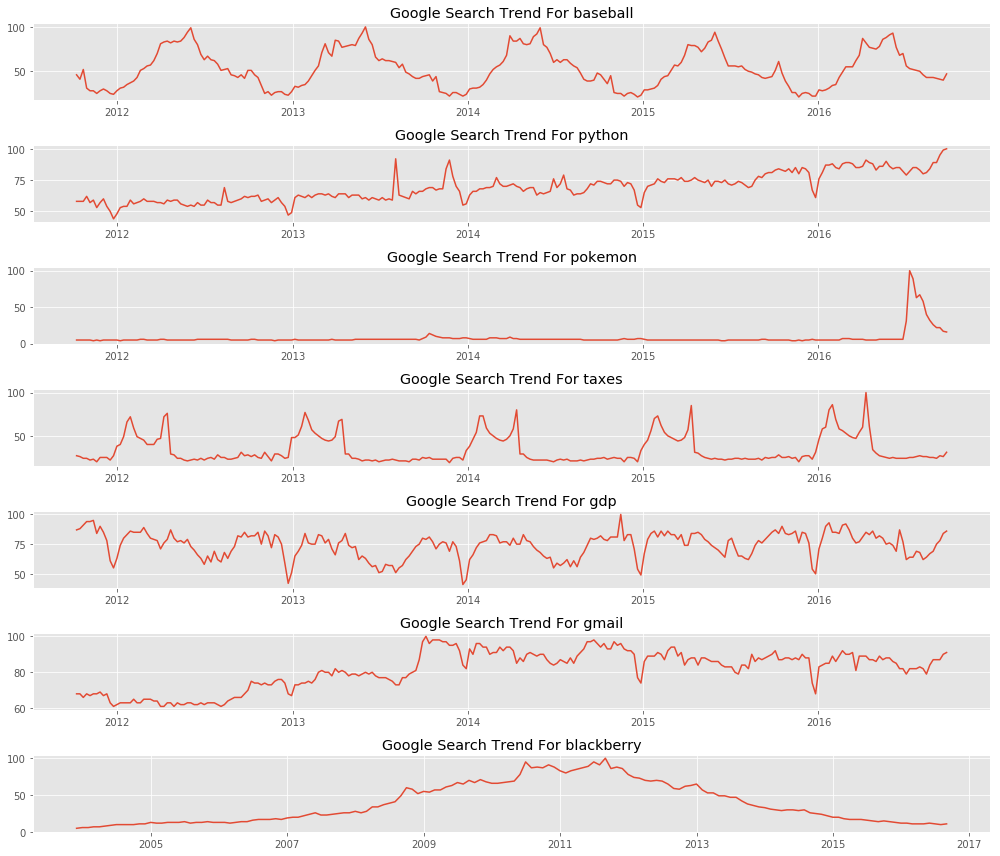

In [3]:
def plot_trend_data(ax, name, series):
    ax.plot(series.index, series)
    ax.set_title("Google Search Trend For {}".format(name))
    
google_search_names = ['baseball', 'python', 'pokemon', 'taxes', 'gdp', 'gmail', 'blackberry']

google_trends = {
    name: load_google_trend_data(name)
    for name in google_search_names
}

fig, axs = plt.subplots(len(google_trends), figsize=(14, 12))

for ax, name in zip(axs, google_search_names):
    plot_trend_data(ax, name, load_google_trend_data(name))
    
plt.tight_layout()

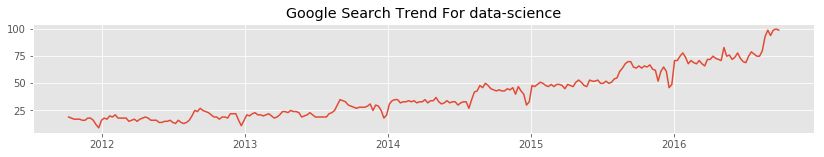

In [4]:
fig = plt.figure(figsize=(14,2))
ax = plt.subplot(111)
plot_trend_data(ax, 'data-science', load_google_trend_data('data-science'))

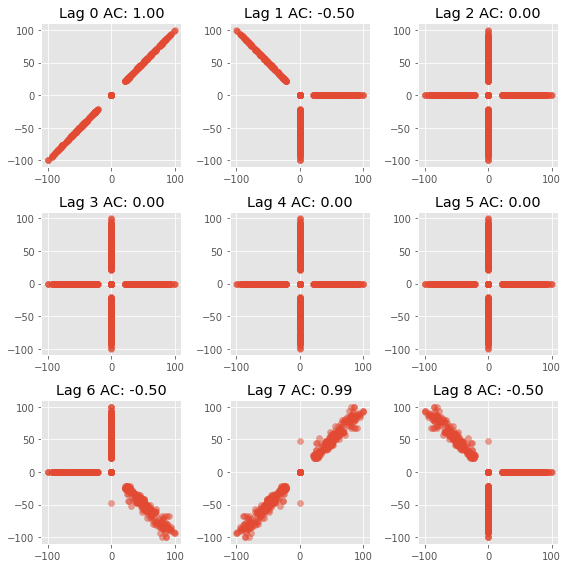

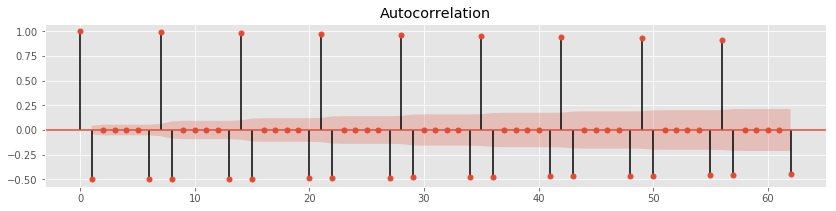

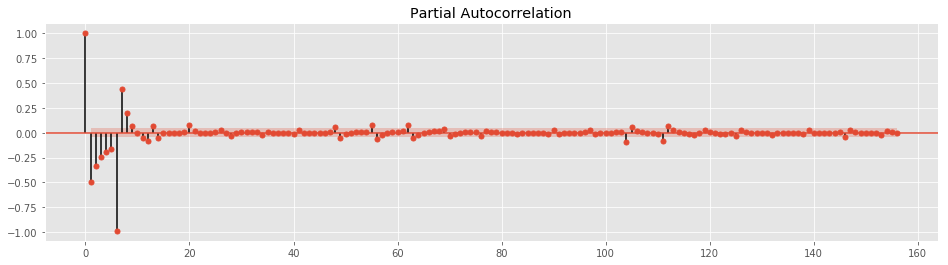

ARIMA(3, 1, 0) coefficients :
  Intercept -0.01
  AR ['-0.75', '-0.50', '-0.25']


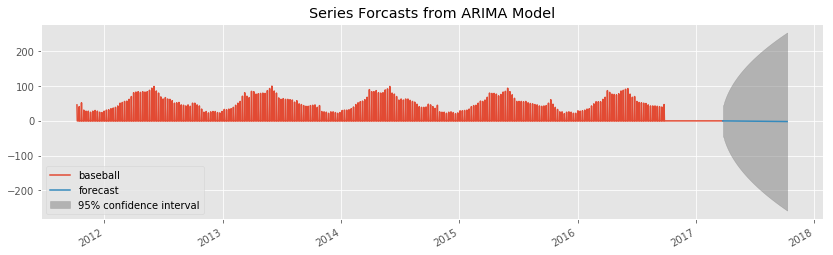

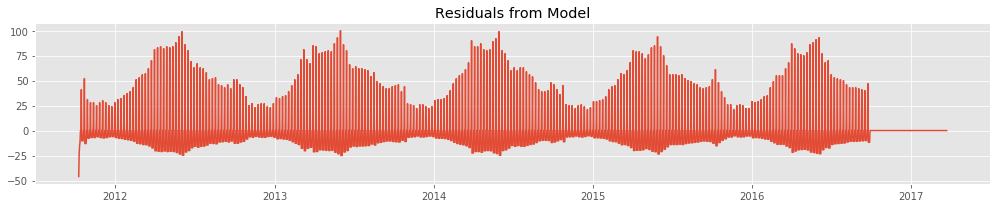

ARIMA(3, 1, 0) AIC: 18151.05189850927
ARIMA(2, 1, 0) AIC: 18277.295505348342
ARIMA(4, 1, 0) AIC: 18071.984448059287
ARIMA(3, 1, 1) AIC: 17251.467829621462
ARIMA(3, 1, 0) coefficients :
  Intercept -0.50
  AR ['-0.75', '-0.50', '-0.25']


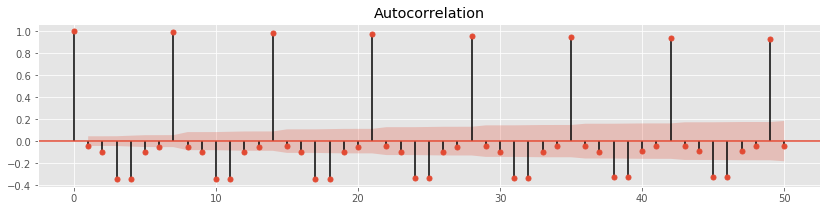

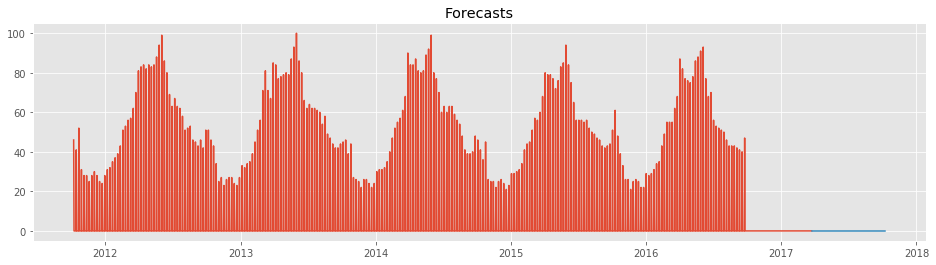

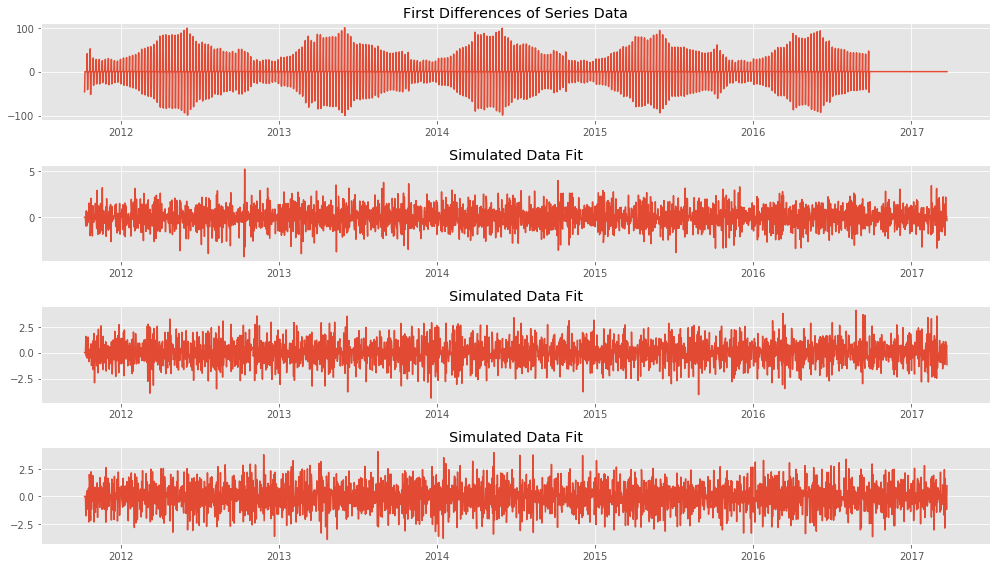

(<statsmodels.tsa.arima_model.ARIMAResultsWrapper at 0x122aae550>,
 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1232b2710>)

In [5]:
timeseries.make_arema_prediction(google_trends['baseball'], freq='D')

In [ ]:
for key in google_trends:
    print(key)
    print()
    timeseries.make_arema_prediction(google_trends[key], freq='W')

In [ ]:
baseball_series = google_trends['baseball']
baseball_series.index = pd.DatetimeIndex(start='10-7-2011', end='9-25-2016', freq='W')
baseball_series = baseball_series.reindex(pd.DatetimeIndex(
        start='10-7-2011', end='2020', freq='W'))
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot(baseball_series.index, baseball_series)

preds = baseball_model.predict('2016-09-17', '2020', 
                   dynamic=True, ax=ax, plot_insample=False)

ax.plot(preds.index, preds)
ax.set_title("Forecasts for Baseball Search Popularity")

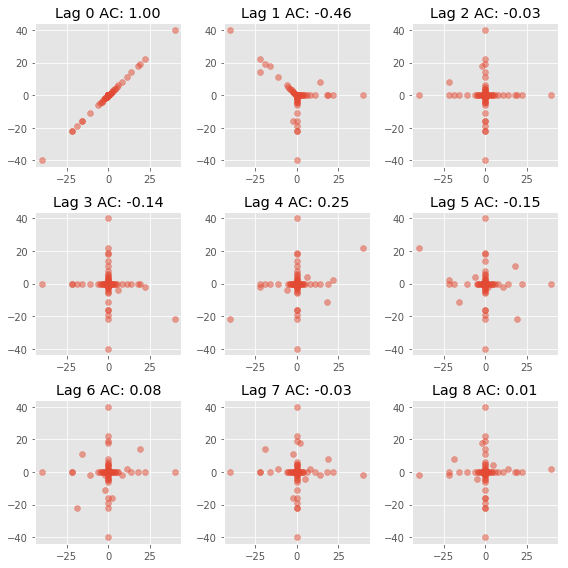

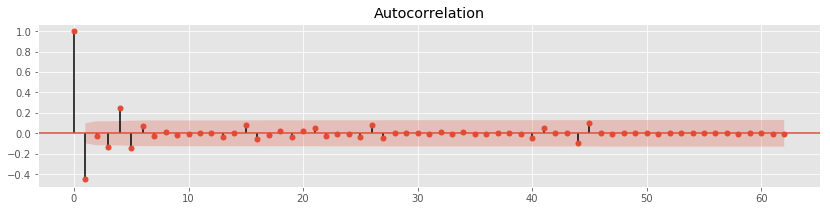

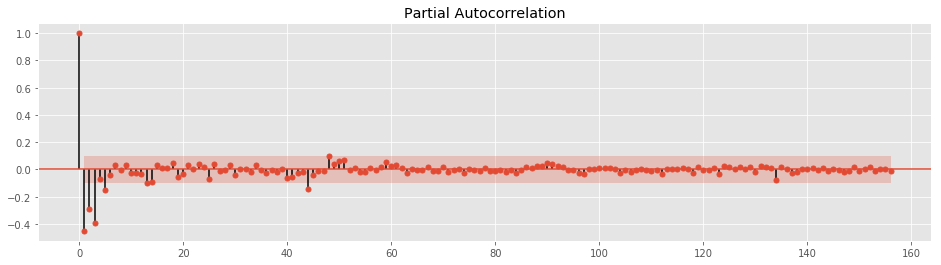

ARIMA(3, 1, 0) coefficients :
  Intercept -0.01
  AR ['-0.76', '-0.59', '-0.44']


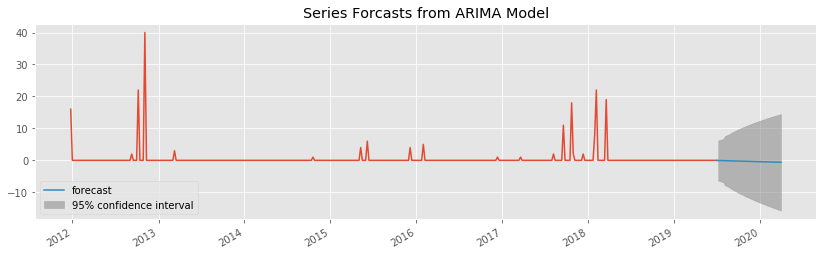

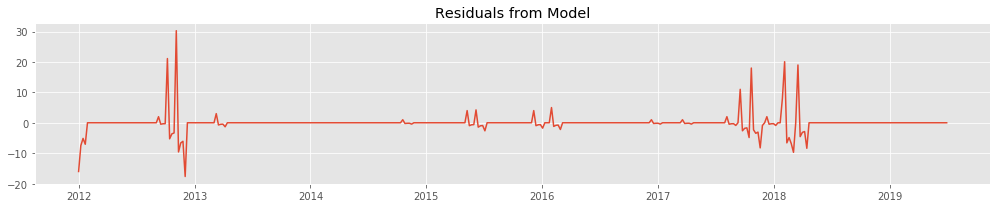

ARIMA(3, 1, 0) AIC: 2035.1956970474002
ARIMA(2, 1, 0) AIC: 2114.256246607536
ARIMA(4, 1, 0) AIC: 2029.4005526466572
ARIMA(3, 1, 1) AIC: 2008.2801441154033
ARIMA(3, 1, 0) coefficients :
  Intercept -0.47
  AR ['-0.76', '-0.59', '-0.44']


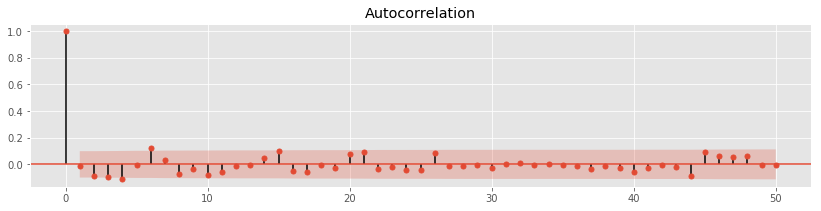

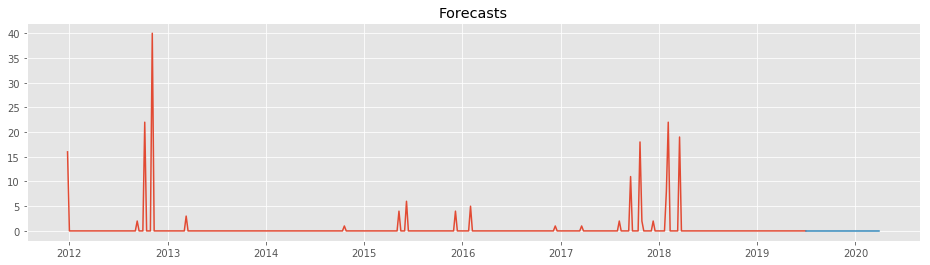

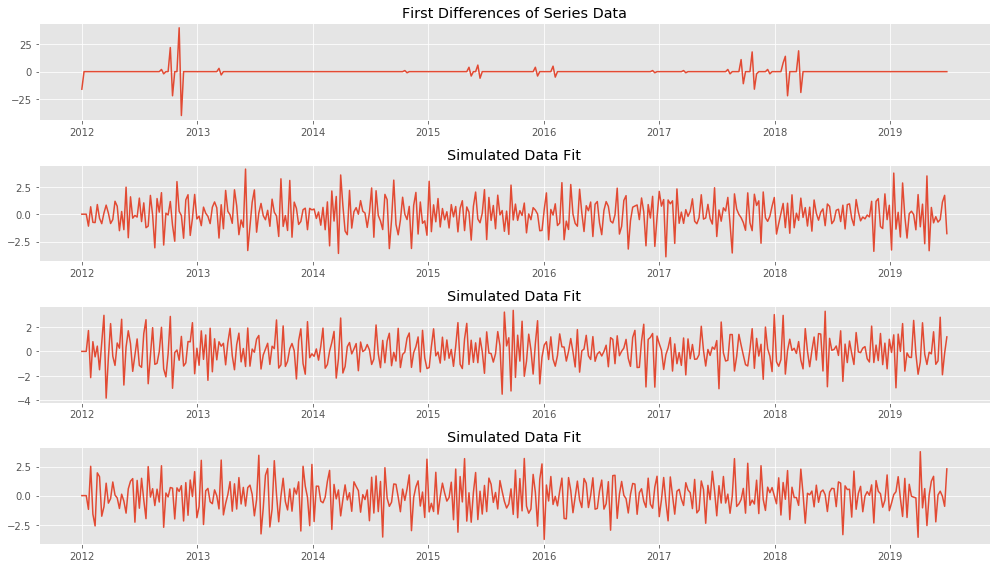

In [8]:
timeseries.main()